In [1]:
# %load test.py
"""
Created on Thu Aug  1 14:08:58 2024

@author: joseph@艾鍗學院 www.ittraining.com.tw
"""
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
os.environ['OMP_NUM_THREADS']='1'

import cv2

from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import glob

from sklearn.decomposition import PCA

In [2]:

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    
    img_array = cv2.imread(img_path)     
    #resized_img = cv2.resize(original_img, (224, 224))
    return img_array, img_array




In [3]:
def plot_histogram(hist, bins=(8, 8, 8)):
    """
    Plot the histogram for each channel.

    Parameters:
    - hist: The histogram array for each channel.
    - bins: The number of bins for each channel.
    """
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    channel_names = ['Hue', 'Saturation', 'Value']
   
    channel_n=len(channel_names)
    #bins=(8, 8, 8), 0~256產生bins[i]+1點 , 256/bins[i]=256/8=32
    #bin_edges=[[0,32,64,...,256],[0,32,64,...,256],[0,32,64,...,256]]
    bin_edges = [np.linspace(0, 256, bins[i]+1) for i in range(channel_n)] 
    

            
        
    for i in range(channel_n):

        if i == 0: #H
            bin_heights = hist.sum(axis=(1, 2))  # Sum histogram counts along axes 1 and 2
        elif i == 1: #S
            bin_heights = hist.sum(axis=(0, 2))  # Sum histogram counts along axes 0 and 2
            #print('S:',bin_heights)
        else:  # V
            bin_heights = hist.sum(axis=(0, 1))  # Sum histogram counts along axes 0 and 1


        
        bin_positions = bin_edges[i][:-1]  # Bin positions along the i-th dimension (excluding the last edge)
        bin_width = bin_edges[i][1] - bin_edges[i][0]  # Calculate the bin width
        axs[i].bar(bin_positions,bin_heights,width=bin_width)
        axs[i].set_title(f'{channel_names[i]} Histogram')
        axs[i].set_xlabel(channel_names[i])
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

def plot_custer(labels,image_paths):
    
    n_clusters=len(set(labels))
    
    # Plot all images in the same cluster
    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        num_images = len(cluster_indices)

        plt.figure(figsize=(20, num_images))
        plt.suptitle(f'Cluster {cluster}', fontsize=20)

        for i, idx in enumerate(cluster_indices):
            img_path = image_paths[idx]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')

    plt.show()

In [22]:
# Function to extract color features (average color)
def extract_color_features(image, bins=(8, 8, 8)):
    
    
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    #Define a circular mask (e.g., a circular mask centered in the image)
    #center = [image.shape[1] // 2, image.shape[0] // 2]
    #radius = min(image.shape[0], image.shape[1]) //3
  
    #cv2.circle(mask, center, radius, 255, thickness=-1) # -1 : fill with white color (255)

    # Define the top-left and bottom-right corners of the rectangle
    #center = [image.shape[1] // 2, image.shape[0] // 2]
    #radius = min(image.shape[0], image.shape[1]) //3
    #top_left = (center[0]- radius, center[1]- radius)# Example coordinates, change as needed
    #bottom_right = (center[0]+ radius, center[1]+ radius) # Example coordinates, change as needed
    
    print(image.shape[0],image.shape[1])
    s_h ,s_w= image.shape[0]//4, image.shape[1]//4
    
    top_left = (s_w,s_h)
    bottom_right=(image.shape[1]-s_w,image.shape[0]-s_h)
    
    print(top_left,bottom_right)

    # Draw the rectangle on the mask (white rectangle on black background)
    cv2.rectangle(mask, top_left, bottom_right, (255), thickness=-1)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    
    '''
    Enhance the image
    new_image(i,j)=alpha⋅image(i,j)+beta
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 50    # Brightness control (0-100)
    
    '''
 
    new_image = cv2.convertScaleAbs(image, alpha=1.15, beta=15)

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.show()
    image=new_image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    
   
    # Convert the image to HSV color-space
    # Normalize pixel values to the range [0, 1]
   
    hsv_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)


    # Convert back to BGR color space

    # Compute the color histogram
   
    hist = cv2.calcHist([hsv_image], [0, 1,2], mask, bins, [0, 180, 0, 256,0, 256])
    
    # Normalize the histogram
    hist = cv2.normalize(hist, hist)

   
    

    
    print(hist.shape)
    # Plot the histogram
    plot_histogram(hist,bins)
    
    flattened_image=hist.flatten()
    #combined_features = np.concatenate((flattened_image, concatenated_HSV))
    #print(combined_features.shape)
    return flattened_image
    
    
    # Apply PCA
    '''
    pca = PCA(n_components=10) # 
    flattened_image=hist.flatten().reshape(-1,sum(bins))
    print(flattened_image.shape)
    pca_image = pca.fit_transform(flattened_image)
    print(pca_image.shape)
    
    return pca_image.flatten()
    '''

images2\0.jpg
360 246
(61, 90) (185, 270)


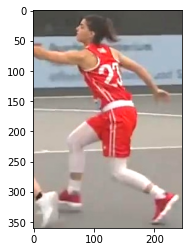

(8, 8, 8)


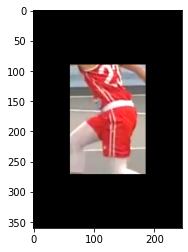

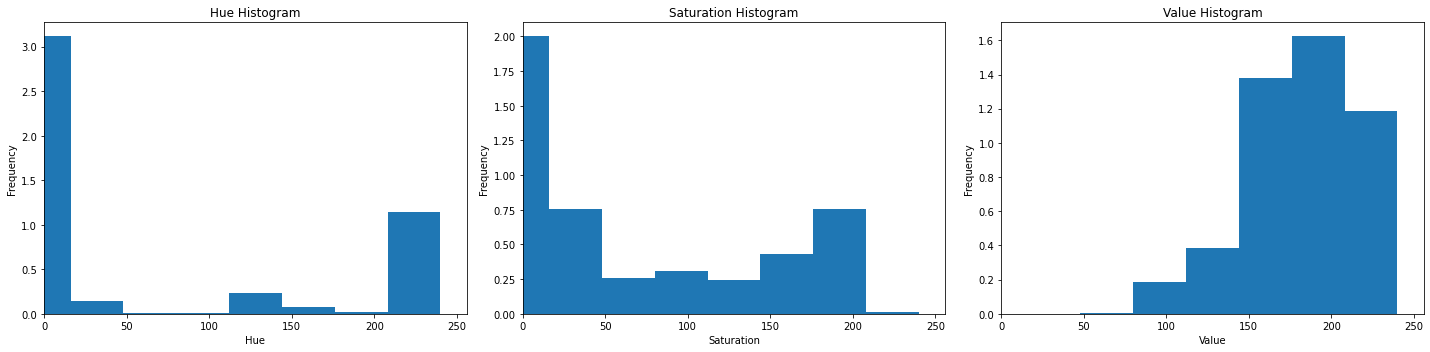

images2\1.jpg
332 123
(30, 83) (93, 249)


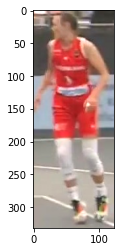

(8, 8, 8)


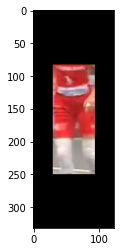

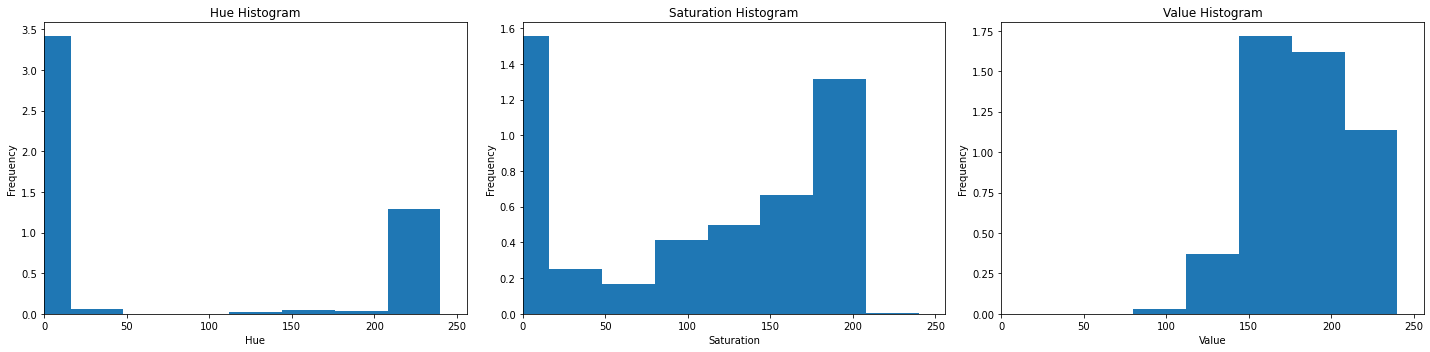

images2\2.jpg
296 105
(26, 74) (79, 222)


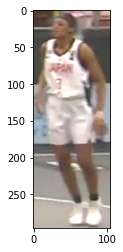

(8, 8, 8)


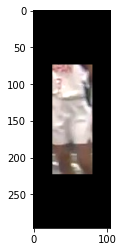

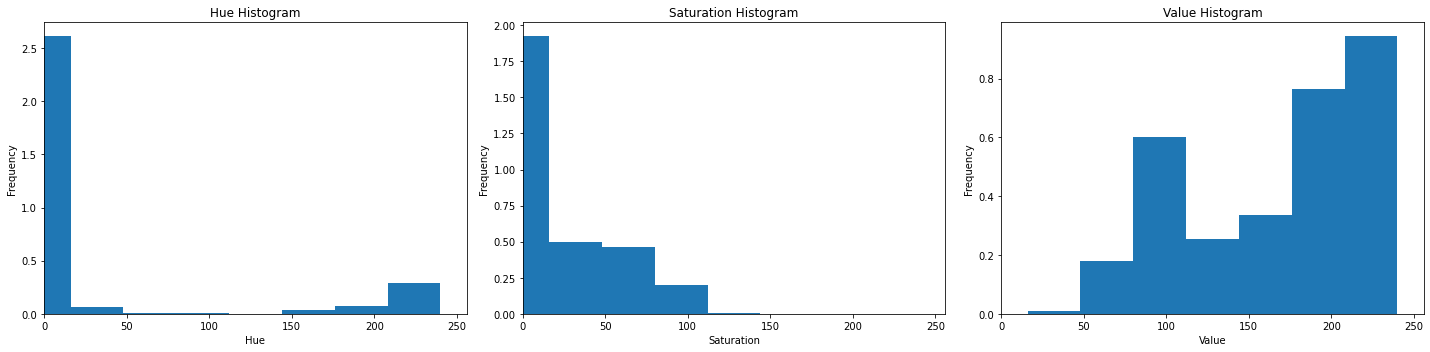

images2\7.jpg
374 277
(69, 93) (208, 281)


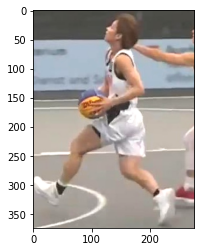

(8, 8, 8)


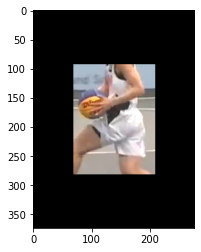

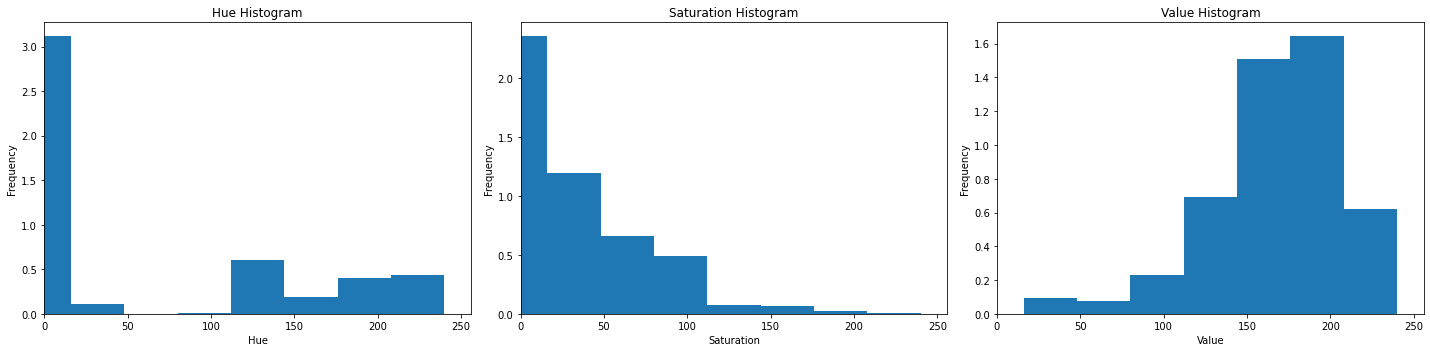

images2\8.jpg
374 277
(69, 93) (208, 281)


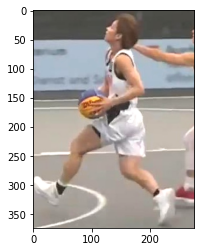

(8, 8, 8)


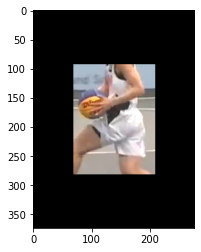

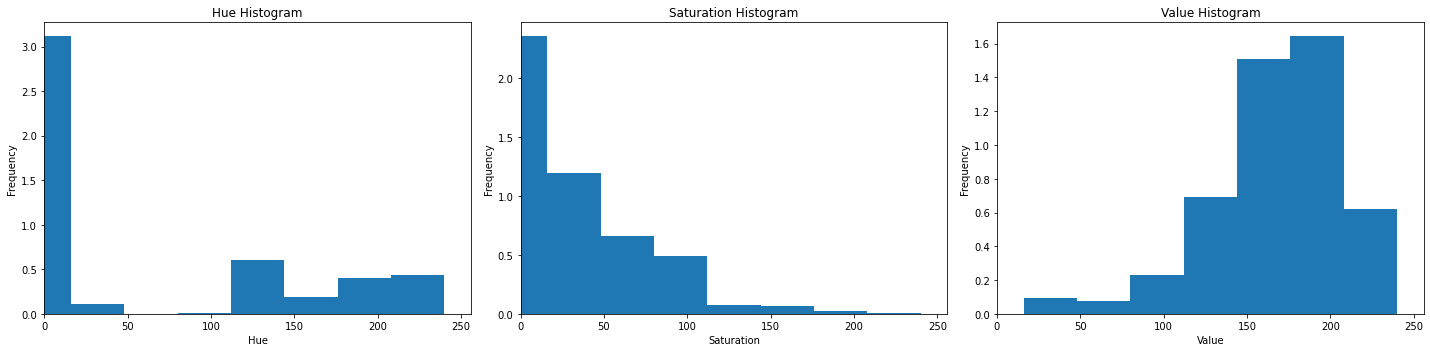

In [25]:
# Directory containing your images
image_dir = 'images2/*'
color_bins=(8,8,8)
# Extract features from each image
features_list = []
image_paths = glob.glob(image_dir)

for img_path in image_paths:
    
    print(img_path)
    resized_img_array,original_img_array = load_and_preprocess_image(img_path)

    color_features = extract_color_features(original_img_array,color_bins)  #color feature (512,)
    features_list.append(color_features) 
    #print(combined_features.shape)

features_array = np.array(features_list)


In [6]:
features_array.shape

(5, 4096)

Image: images2\0.jpg - Cluster: 0
Image: images2\1.jpg - Cluster: 0
Image: images2\2.jpg - Cluster: 0
Image: images2\7.jpg - Cluster: 1
Image: images2\8.jpg - Cluster: 1


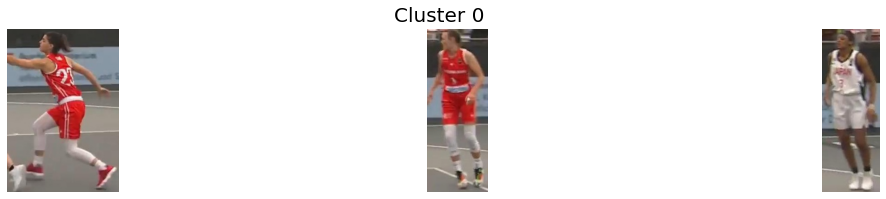

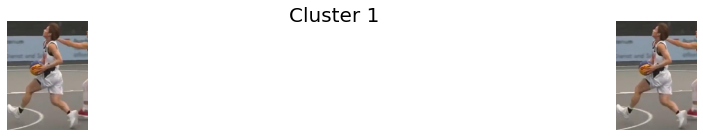

In [26]:
# Perform clustering
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters,n_init=12)
kmeans.fit(features_array)
labels = kmeans.labels_

# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels,image_paths)

[2 1 2 1 2]
Image: images\0.jpg - Cluster: 2
Image: images\1.jpg - Cluster: 1
Image: images\2.jpg - Cluster: 2
Image: images\3.jpg - Cluster: 1
Image: images\4.jpg - Cluster: 2


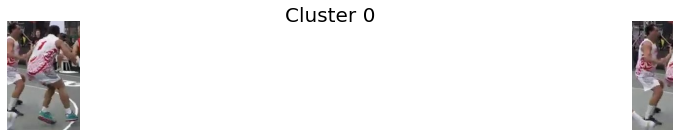

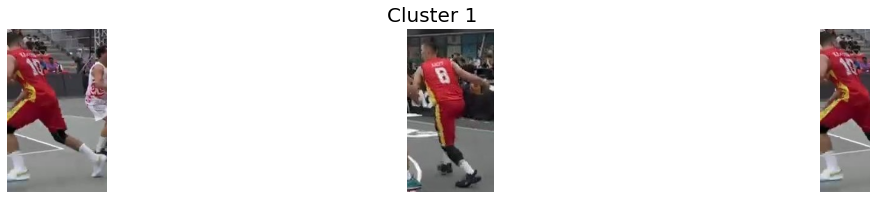

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
linked = linkage(features_array, method='ward') # single, ward
labels = fcluster(linked, t=2, criterion='maxclust')
print(labels)
# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

    
plot_custer(labels-1,image_paths)

[2 1 2 1 2]
Image: images\0.jpg - Cluster: 2
Image: images\1.jpg - Cluster: 1
Image: images\2.jpg - Cluster: 2
Image: images\3.jpg - Cluster: 1
Image: images\4.jpg - Cluster: 2


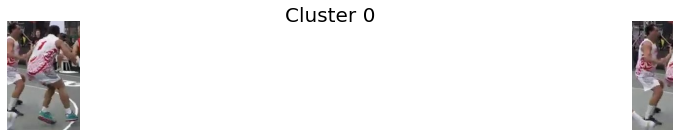

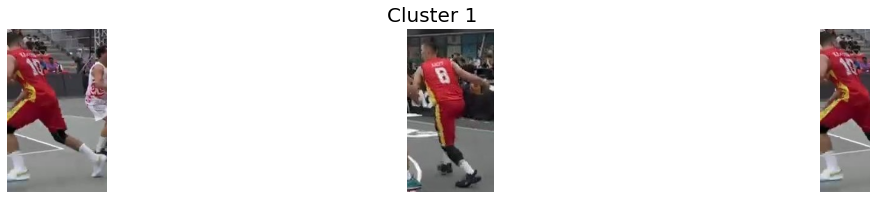

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
# Perform hierarchical clustering
# Compute cosine distance matrix
cosine_distances = pdist(features_array, metric='cosine')

# Perform hierarchical clustering using the cosine distance matrix
linked = linkage(cosine_distances, method='average')

#linked = linkage(pca_features, method='ward')
labels = fcluster(linked, t=2, criterion='maxclust')
print(labels)
# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels-1,image_paths)

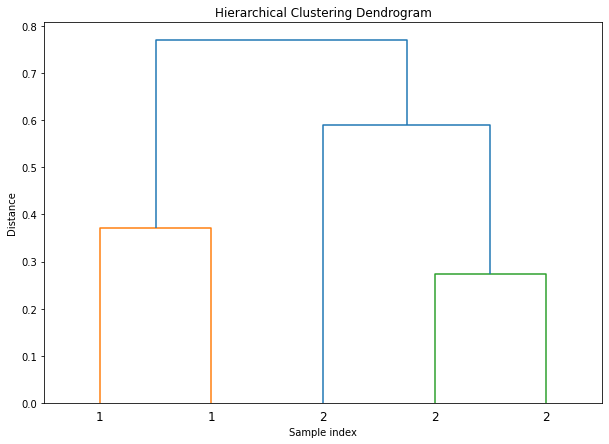

In [10]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# excricise 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'hist' is your HSV histogram with shape (2, 2, 3)
hist = np.array([[[1, 2, 3], [4, 5, 6]],
                 [[7, 8, 9], [10, 11, 12]]])

# Sum along axes 1 and 2 to get the distribution of the Hue component
hue_distribution = hist.sum(axis=(1, 2))
print('hist.shape',hist.shape)
print("Hue distribution:", hue_distribution)


hist.shape (2, 2, 3)
Hue distribution: [21 57]


In [12]:
hist

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [13]:
hist.sum(axis=(0,1))

array([22, 26, 30])

In [14]:
hist[:,1,:]

array([[ 4,  5,  6],
       [10, 11, 12]])

In [15]:
hist[0][1]

array([4, 5, 6])

In [16]:
hist[1][1]

array([10, 11, 12])

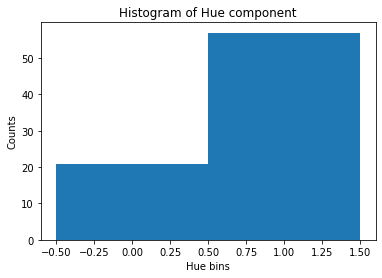

In [17]:
# Plot the histogram for the Hue component
bin_edges_hue = np.arange(hist.shape[0] + 1)  # +1 because bin_edges are always one more than bins
bin_width_hue = bin_edges_hue[1] - bin_edges_hue[0]

plt.bar(bin_edges_hue[:-1], hue_distribution, width=bin_width_hue, align='center')
plt.xlabel('Hue bins')
plt.ylabel('Counts')
plt.title('Histogram of Hue component')
plt.show()